# Predicting Usage of a Video Game Research Server

## Project Final Report

##### Group 13 - Section 005

## Introduction

A research group in the Department of Computer Science at UBC, called The Pacific Laboratory for Artificial Intelligence (PLAI), is working on advancing AI into something more safe and reliable, that we can all trust. One of their projects is a research data collection project that focusses on generative AI (The Pacific Laboratory for Artificial Intelligence, 2023). PLAI has created an online server called "plaicraft.ai", that is a free version fo Minecraft, that anyone can sign up for and play They collect data about the players and how they interact with the server, with the goal of using the data to create AI characters that respond to aspects in the video game in a way that's "smarter" than current non-player characters (Smith, 2023).

Using this collected data, the main goal of our project is to answer the question of "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?", with a more specefic question of "Can age, gender, experience, and average play time per session predict the subscription of a player?".

#### Description of Datasets

The first dataset we used to answer our question is the `players.csv` dataset.

This dataset is about 196 players in the Minecraft server, including:
- `experience` - (Amateur, Beginner, Regular, Pro, Veteran)
- `subscribe` - Subscription to the newsletter (TRUE/FALSE)
- `hashedEmail` - String of letters and numbers to identify player
- `played_hours`
- `name`
- `gender` - (Agender, Female, Male, Non-Binary, Two-Spirited, Other, Prefer not to say)
- `age`


The second dataset we used to answer our question is the `sessions.csv` dataset.

This dataset is about 1535 sessions of play, including:
- `hashedEmail`
- `start_time` - Including date and time
- `end_time` - Including date and time
- `original_start_time` 
- `original_end_time`

We used, from the `players.csv` data set, the `subscribe` variable as our response variable and `age`, `gender`, `experience` variables as three of our preedictor variables. From both the `players.csv` data set and `sessions.csv`, we used the `hashedEmail` variable to combine the data from both data sets. And from the `sessions.csv` data set, we used the `original_start_time` and `original_end_time` to find the average play time per session for each player.

## Methods and Results

In [1]:
#Loading all necessary libraries for data analyis
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
library(cowplot)
set.seed(525) 
options(repr.plot.height = 6, repr.plot.width = 7)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The first step in our data analysis is to load the `players.csv` and `sessions.csv` datasets.

In [2]:
players_url <- "https://raw.githubusercontent.com/sarahmontgomery04/project-data/refs/heads/main/players.csv"
players <- read_csv(players_url)
players

sessions_url <- "https://raw.githubusercontent.com/sarahmontgomery04/project-data/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Now, we are going to compute the mean and median of the numbered statistics from the players dataset, that we're using, which is just the age.

In [3]:
players_age <- players |>
    summarize(mean_age = mean(Age), median_age = median(Age)) |>
    select(mean_age, median_age)
players_age

mean_age,median_age
<dbl>,<dbl>
NA,NA


We're getting "NA" values for both summary statistics indicating some of the observations have missing values for age, therefore we will repeat the process while removing these missing values.

In [4]:
players_age <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE), median_age = median(Age, na.rm = TRUE)) |>
    select(mean_age, median_age)
players_age

mean_age,median_age
<dbl>,<dbl>
20.52062,19


We've now learned that the mean and median ages are similar, indicating the values are not skewed and some of the age values are missing. For now, we will keep the NA values and tidy the data by removing `name` and `played_hours`, since they're not involved in our analysis.

In [5]:
players_tidy <- players |>
    select(-name, -played_hours)
players_tidy

experience,subscribe,hashedEmail,gender,Age
<chr>,<lgl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,Other,NA


Now, we'll look at the sessions dataset. From this dataset, we only want the `hashedEmail` and we want to find the average play time per session, which we'll call `mean_session_time_mins`, for each player using the `start_time` and `end_time`.

In [6]:
sessions_tidy <- sessions |>
    select(hashedEmail, start_time, end_time) |> 
    separate(start_time, into = c("start_date", "start_time"), sep = " ") |> 
    separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
    mutate(start_time = as.POSIXct(start_time, format = "%H:%M")) |>
    mutate(end_time = as.POSIXct(end_time, format = "%H:%M")) |>
    mutate(total_time = as.numeric(abs(start_time - end_time), units = "mins")) |>  # Convert duration to numeric
    select(hashedEmail, total_time) |>
    group_by(hashedEmail) |> 
    summarize(mean_session_time_mins = as.double(mean(total_time, na.rm = TRUE)))  # Ensure it's double

sessions_tidy

hashedEmail,mean_session_time_mins
<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,712
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,33.73871
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.00000
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.00000


Since, we want to use variables from both datasets, we will merge the date using the `hashedEmail` variable and then remove it, since it's unnecessary for the rest of the data analysis. Next, we use `mutate` to convert the `subscribe` variable into a categorical factor. This transformation ensures that `subscribe` is treated as a categorical variable rather than a numerical one, which is important for classification and modeling tasks, since it relies on the distance from points in the dataset.

In [7]:
plaicraft_data <- merge(sessions_tidy, players_tidy, by = "hashedEmail") |>
    select(-hashedEmail) |>
    mutate(subscribe = as.factor(subscribe))

plaicraft_data

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<chr>,<fct>,<chr>,<dbl>
712,Regular,TRUE,Male,20
30,Pro,FALSE,Male,21
11,Beginner,TRUE,Male,17
⋮,⋮,⋮,⋮,⋮
33.73871,Amateur,TRUE,Male,23
9.00000,Amateur,TRUE,Male,17
72.00000,Beginner,TRUE,Male,20


### Data Preprocessing: Filtering and Label Encoding

Before using our dataset for training, we need to clean and transform categorical variables into numerical values for compatibility with machine learning models.

#### Filtering Gender
We start by filtering the dataset to include only players whose gender is either "Male" or "Female". This step is necessary because other gender categories might have too few observations, which could lead to unreliable model performance.

#### Label Encoding
Next, we apply label encoding to convert categorical variables into numerical values:
- **Experience Level**: We transform the `experience` variable into ordered numeric values using `factor()`, mapping levels from "Beginner" to "Veteran" as 1 to 5.
- **Gender**: We convert gender into a binary numeric variable, where "Male" is assigned 1 and "Female" is assigned 0.

We achieve these transformations using the `mutate()` function. This ensures that our dataset is properly formatted for machine learning models that require numerical predictors.

In [8]:
plaicraft_clean <- plaicraft_data |>  
    filter(gender == "Male"| gender == "Female")|>                   #only choose male and female
mutate(experience = as.numeric(factor(experience, 
                                        levels = c("Beginner", 
                                                   "Amateur", 
                                                   "Regular", 
                                                   "Pro", 
                                                   "Veteran"))),
        gender = as.numeric(gender == "Male"))


plaicraft_clean

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
712,3,TRUE,1,20
30,4,FALSE,1,21
11,1,TRUE,1,17
⋮,⋮,⋮,⋮,⋮
33.73871,2,TRUE,1,23
9.00000,2,TRUE,1,17
72.00000,1,TRUE,1,20


#### Splitting the Dataset into Training and Testing Sets

To train and evaluate our model, we need to split the dataset into training and testing subsets. We use the `initial_split()` function to achieve this while ensuring a balanced distribution of the `subscribe` variable.

#### Stratified Sampling
We specify `strata = subscribe` to perform stratified sampling, which helps maintain the proportion of subscribers and non-subscribers in both the training and testing sets. This prevents imbalances that could bias the model.

#### Training and Testing Sets
- **`plaicraft_train`**: Contains 65% of the data, which will be used for training the model.
- **`plaicraft_test`**: Contains the remaining 35% of the data, which will be used for evaluating the model’s performance.

Finally, we use `nrow()` to check the number of observations in both subsets.

This split ensures that our model learns from a representative portion of the dataset while keeping a separate set for unbiased performance evaluation.


In [9]:
plaicraft_split <- initial_split(plaicraft_clean, prop=0.65, strata = subscribe)

plaicraft_train <- training(plaicraft_split)
                   
plaicraft_test <- testing(plaicraft_split)

plaicraft_train

nrow(plaicraft_train)
nrow(plaicraft_test)

mean_session_time_mins,experience,subscribe,gender,Age
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
30,4,FALSE,1,21
18,1,FALSE,0,37
5,2,FALSE,1,21
⋮,⋮,⋮,⋮,⋮
80,4,TRUE,1,17
9,2,TRUE,1,17
72,1,TRUE,1,20


[1] 69

[1] 38

We can see that there are 69 rows in our training data, and 38 rows in our testing data.

#### Summarizing the Data  

Before building our classifier, we summarize the dataset to gain insights into the distribution of variables based on subscription status. Since our dataset contains multiple predictors, we analyze them separately rather than visualizing the entire dataset at once, as it would create a very complex visualization.

#### Calculating Mean Values by Subscription Status  
We use the `group_by(subscribe)` function to group the data by subscription status (subscribed or not). Then, we apply `summarize()` to compute:  
- **Count**: The number of observations in each subscription group.  
- **Mean of Other Variables**: Using `across(-count, mean)`, we calculate the mean of all remaining numerical variables in the dataset, except for the count itself.  

In [10]:
plaicraft_mean <- plaicraft_clean |>
    group_by(subscribe)|>
    summarize(count = n(),
              across(-count, mean))
plaicraft_mean

subscribe,count,mean_session_time_mins,experience,gender,Age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,27,29.84549,3.037037,0.7777778,22.81481
TRUE,80,69.57311,2.712500,0.7750000,19.97500


According to the figure, there are 27 FALSE and 80 TRUE in our data set. This indicates that there are more people who subscribe in this dataset.

We also computed the mean value for all predictors. The figure showed that people with a higher experience level and a higher age are less likely to subscribe to the newsletters. The players who more like to subscribe the news are more likely to be male (since the value is closer to 1) and people who spend more time on this game, during each session.

Then, we can also find the standard deviation for the two participation levels.

In [11]:
plaicraft_sd <- plaicraft_clean |>
    group_by(subscribe)|>
    summarize(across(everything(),sd))
plaicraft_sd

subscribe,mean_session_time_mins,experience,gender,Age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,36.25187,1.556166,0.4236593,8.892681
TRUE,169.24916,1.304265,0.4202169,6.203256


Since gender and subscribe are both numbers that are either 0 or 1, we may observe that they have a comparatively low standard deviation.  The standard deviation is comparatively higher for age and experience.  This implies how crucial it is to center and scale the data when we construct the model later.

### Visualize the Data
We can inspect each predictor separately to find their properties relating to TRUE and FALSE values.

In [12]:
figure1 <- ggplot(plaicraft_clean, aes(y = mean_session_time_mins, x = Age, color = subscribe))+
    geom_jitter(width = 0.3, height = 0.1, size = 3, alpha = 0.8)+
    labs(y="Mean Session Time (mins)",
         x="Age of Player",
         color="Subscribe")+
    ggtitle("Figure 1: Subscribe Based on Age and Mean Session Time")+
    theme(text = element_text(size = 17)) 

In [13]:
figure2 <- ggplot(plaicraft_clean, aes(x=experience, fill=subscribe))+
    geom_bar(position="fill") +
    labs(x="Experience Level",
         y="Proportion",
         color="Subscribe")+
    ggtitle("Figure 2: Proportion of Subscribe by Experience")+
    theme(text = element_text(size = 17))

In [14]:
figure3 <- ggplot(plaicraft_clean, aes(x=gender, fill=subscribe)) +
    geom_bar(position="fill") +
    labs(x="Gender",
         y="Proportion",
         fill="Subscribe") +
    ggtitle("Figure 3: Proportion of Subscribe by Gender") +
    theme(text = element_text(size = 17))

In [15]:
figure4 <- ggplot(plaicraft_clean, aes(x=mean_session_time_mins, y=subscribe, color=subscribe)) +
    geom_jitter(width = 0.3, height = 0.1, size = 3, alpha = 0.8) +
    scale_x_continuous(limits = c(0, 260)) +
    labs(x="Mean Session Time (mins)",
         y="Subscribe",
         color="Subscribe") +
    ggtitle("Figure 4: Subscribe Based on Mean Session Time") +
    theme(text = element_text(size = 17))

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


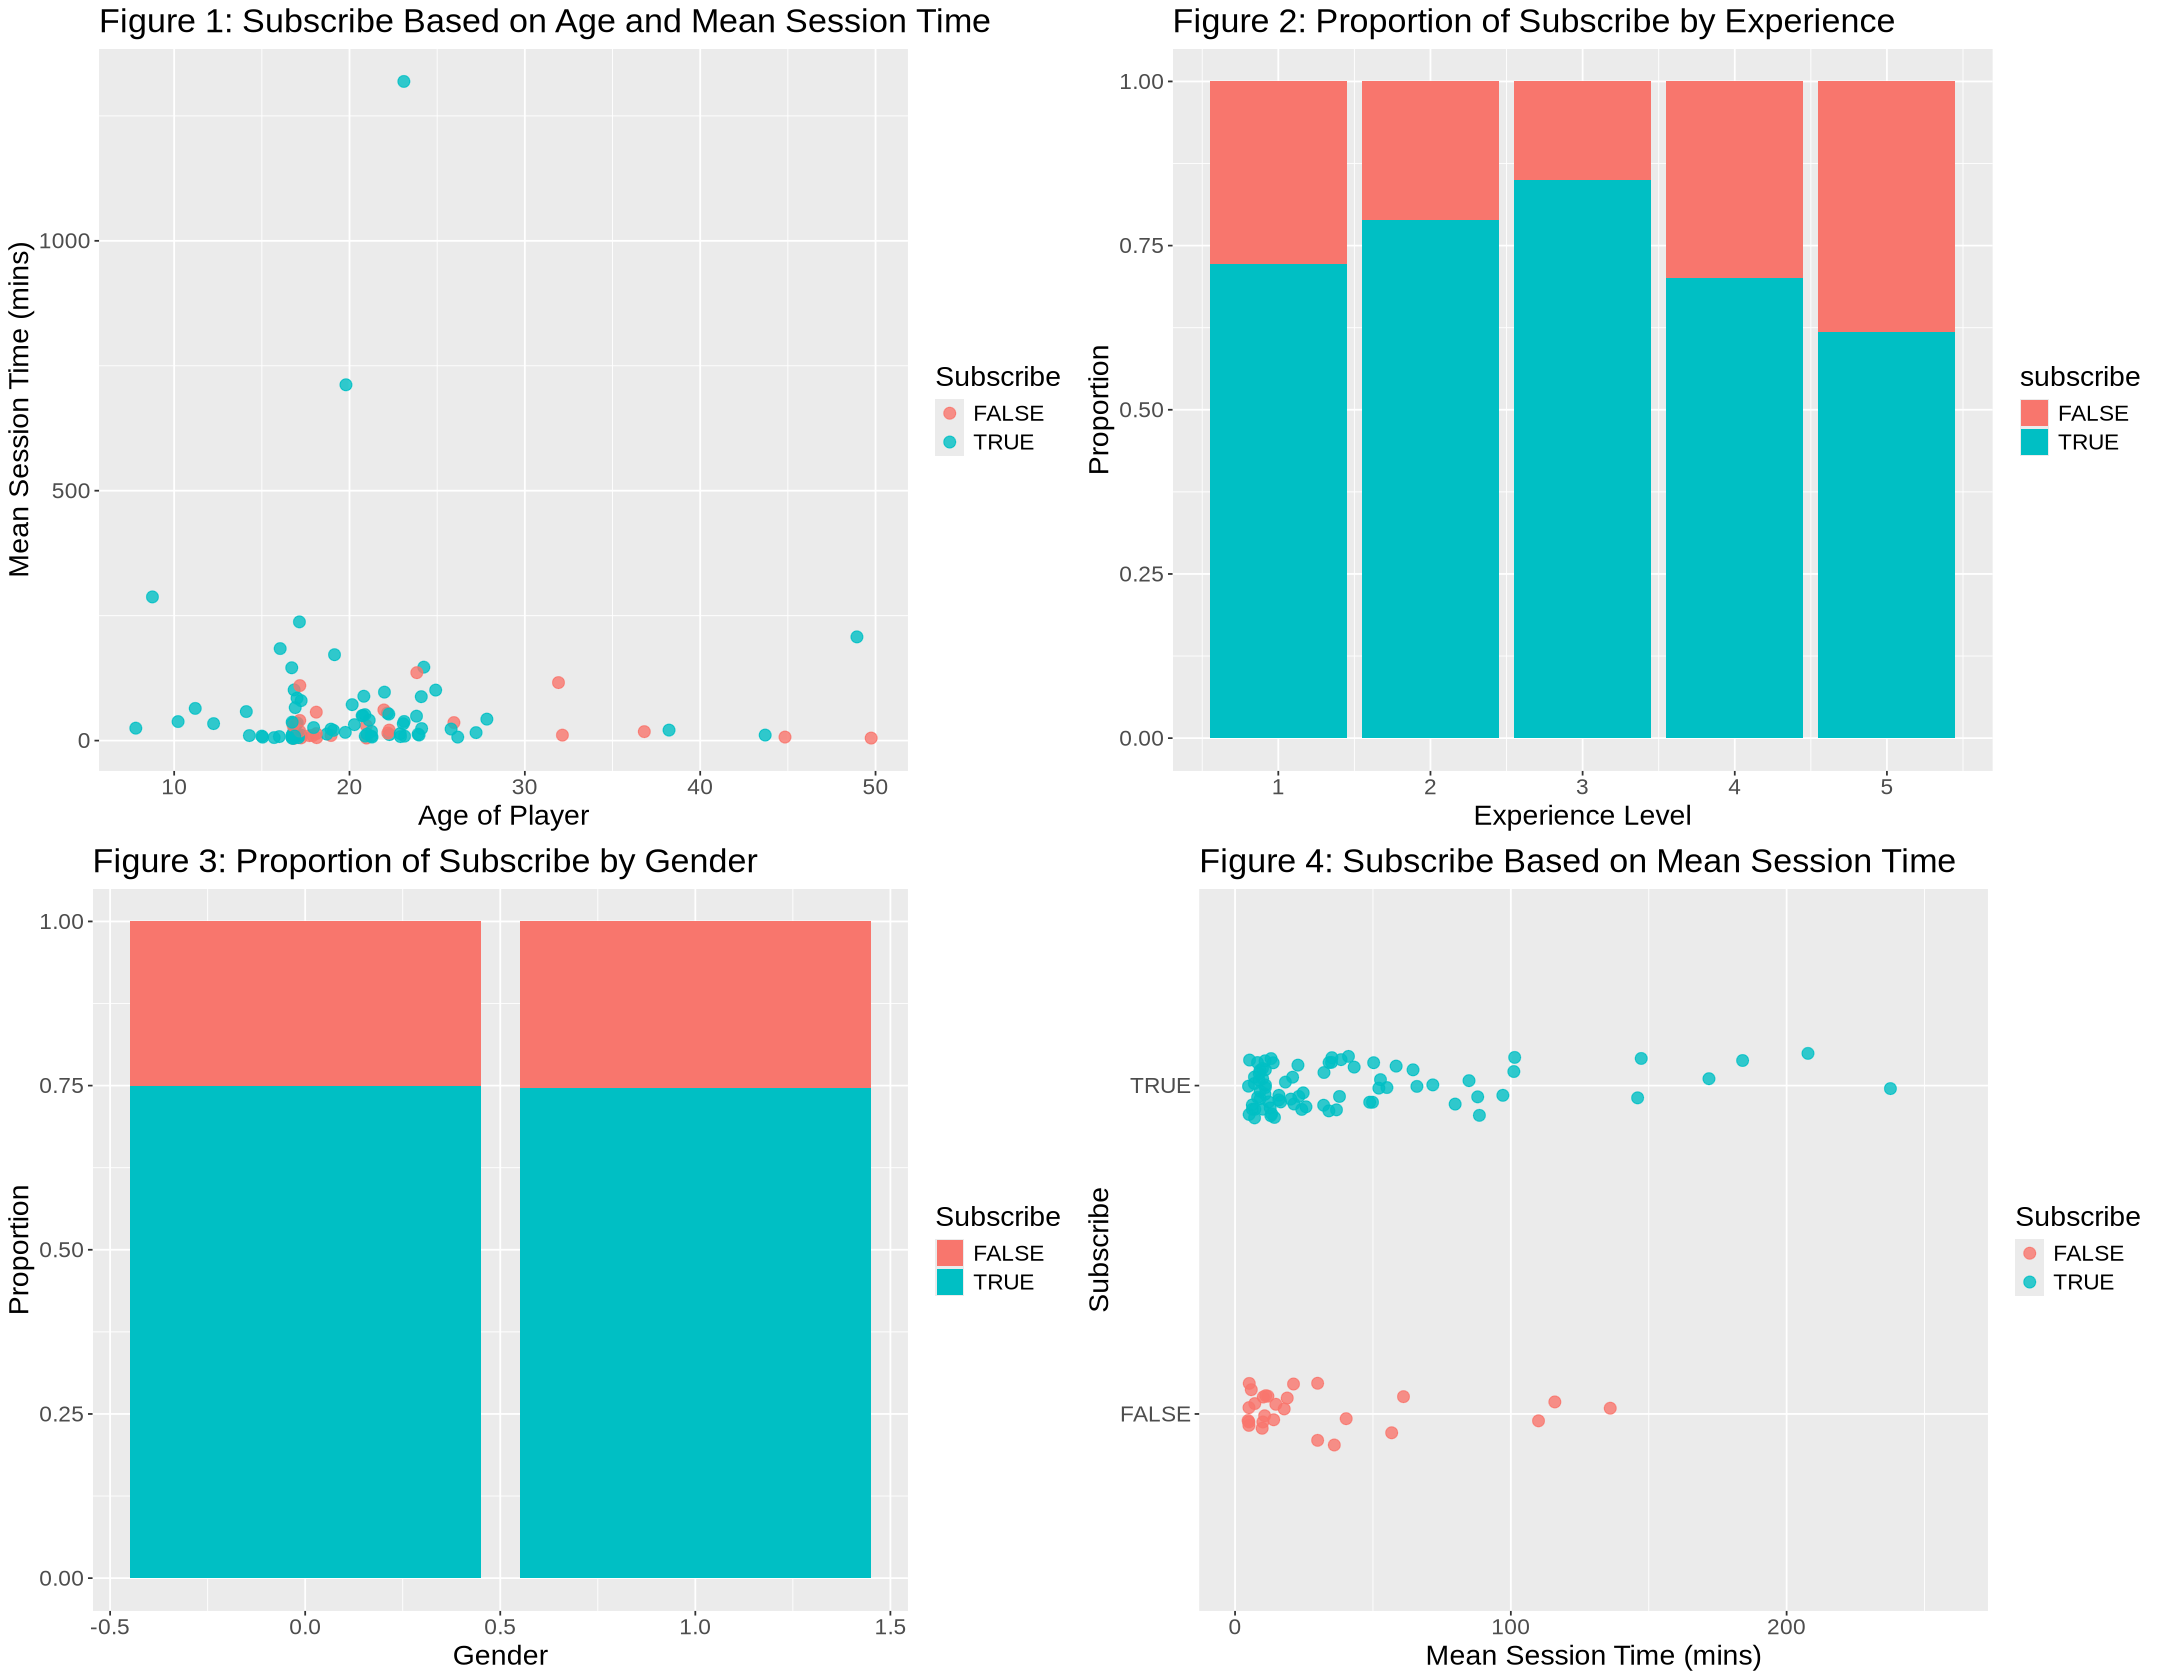

In [49]:
options(repr.plot.width = 18, repr.plot.height = 14)
figures <- plot_grid(figure1, figure2, figure3, figure4)
figures

Looking at the above figures the relationship between the predictors and the response variable (subcription status) look non-linear. This is prevalent in Figure 1, where the data is very clumped. Additionally since two of our predictors were categorical, the values are only whole numbers and therefore decrease any linear relationship there could've been. Therefore, we want to use a K-NN Classification model to predict subscription.

### K-NN Classification
We can now construct the classification model and begin analyzing the data.  We would start by fine-tuning the classifier and selecting the optimal k-value.

Creating the recipe, centering, and scaling each of our predictors is our first step.

In [17]:
plaicraft_recipe <- recipe(subscribe ~ ., data = plaicraft_train)|>
            step_scale(all_predictors())|>
            step_center(all_predictors())


##### Tuning the classifier
Cross-validation of v = 5 and neighbors = tune() allows us to examine the impact of varying k-values on the classifier's accuracy.  We decided to test K-values between 1 and 20 because we don't have many samples.

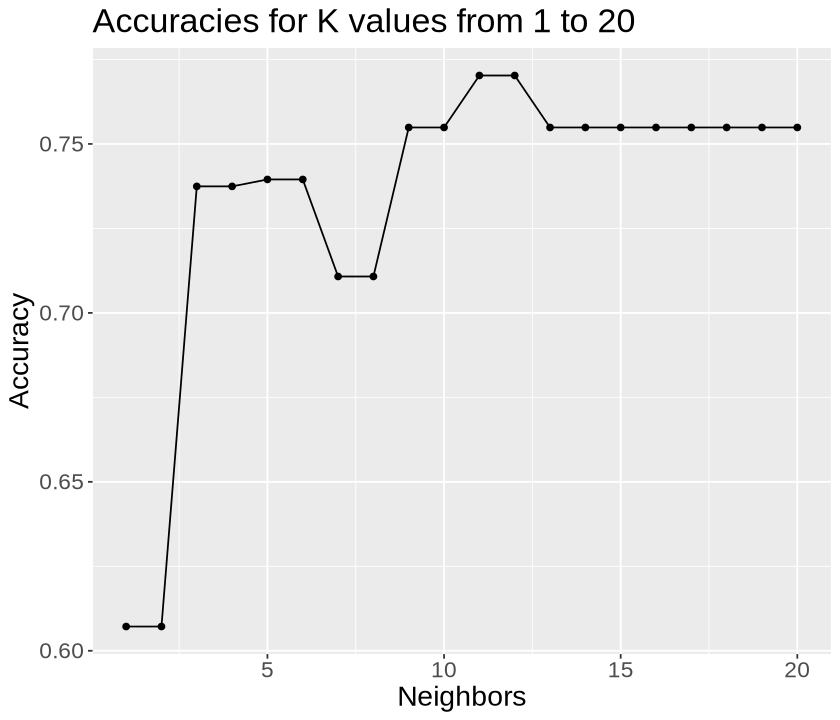

In [35]:
set.seed(525)
options(repr.plot.height = 6, repr.plot.width = 7)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

plaicraft_vfold <- vfold_cv(plaicraft_train, v = 5, strata = subscribe)

tune_results <- workflow() |>
                 add_recipe(plaicraft_recipe) |>
                 add_model(knn_tune) |>
                 tune_grid(resamples = plaicraft_vfold, grid = tibble(neighbors = c(1:20))) |>
                 collect_metrics()|>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(tune_results, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = 'Neighbors', 
                      y = 'Accuracy') +
                 ggtitle("Accuracies for K values from 1 to 20")+
                 theme(text = element_text(size = 17)) 

cross_val_plot

We observe a peak accuracy around **k = 11 or 12**, where the classifier achieves its highest performance. For **k** values greater than 11, the accuracy declines and then is stabilized at a constant level.

When calculating the accuracy of the majority classifier on the training data, we find it to be aorund **77%** (based on the counts in the summary section). Notably, the stabilized accuracy also hovers around **0.77**, suggesting that the decline beyond **k = 12** may be due to overfitting. This overfitting is likely caused by the limited sample size and the imbalance between the two outcome categories.

Since the classifier achieves its highest estimated accuracy at **k = 11 or 12**, we choose **k = 11** as the optimal value, due to the limited size of the data. This selection helps maximize accuracy while minimizing the risk of overfitting.


###  Building and Evaluating the Classifier  

Finally, we create the classifier model using the chosen value of **k = 11**. This model will be used to predict the subscription status based on the test dataset.


In [46]:
set.seed(525)
plaicraft_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
            set_engine("kknn") |>
            set_mode("classification")

plaicraft_fit<- workflow()|>
                add_recipe(plaicraft_recipe) |>
                add_model(plaicraft_spec) |>
                fit(data = plaicraft_train)

Testing the Classifier on Unseen Data  

To evaluate the performance of our classifier, we apply the `plaicraft_fit` model to the unseen testing data from our initial split.  

We use `bind_cols` to combine the prediction results with the test dataset for further analysis.


In [47]:
set.seed(525)
plaicraft_result <- predict(plaicraft_fit, plaicraft_test)|>
    bind_cols(plaicraft_test)

plaicraft_result

.pred_class,mean_session_time_mins,experience,subscribe,gender,Age
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
TRUE,10,5,FALSE,1,19
TRUE,12,2,FALSE,0,17
TRUE,23,3,TRUE,1,19
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,20.50000,4,TRUE,1,19
TRUE,16.00000,2,TRUE,1,27
TRUE,33.73871,2,TRUE,1,23


The predicted class value and the actual value of many rows in our data are displayed in this figure.

 We can now compute the classifier's accuracy and create a confusion matrix.

In [48]:
plaicraft_accuracy <- plaicraft_result |>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")

plaicraft_accuracy

confusion<- plaicraft_result|>
    conf_mat(truth = subscribe, estimate = .pred_class)

confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7631579


          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE      9   28

### Model Performance Evaluation  

The class of particular interest in this classification is the "TRUE" class in `subscribe`, representing individuals who will play more than one session. 

By examining the confusion matrix, we categorize the results as follows:

- **True Positive (TP):** A subscribed player that was correctly classified as subscribed (28)
- **False Positive (FP):** An unsubscribed player that was incorrectly classified as subscribed (9)
- **True Negative (TN):** An unsubscribed player that was correctly classified as unsubscribed (1)
- **False Negative (FN):** A subscribed player observation that was incorrectly classified as unsubscribed (0)

From these values, we can calculate the following metrics:
##### Table 1:
| Metric | Value |
|----------|-----|
| Accuracy | 0.76 |
| Recall | 1.00 |
| Precision | 0.76 |

These results show that the classifier performs well in identifying players who will subscribe, with a perfect recall but a slightly lower precision due to some false positives.


## Discussion

### References

(1) Smith, A. (2023, September 28). plaicraft.ai launch - Pacific Laboratory for Artificial Intelligence. Pacific Laboratory for Artificial Intelligence. https://plai.cs.ubc.ca/2023/09/27/plaicraft/

(2)  The Pacific Laboratory for Artificial Intelligence. (2023, September 28). Home Page - Pacific Laboratory for Artificial Intelligence. Pacific Laboratory for Artificial Intelligence. https://plai.cs.ubc.ca/